<a href="https://colab.research.google.com/github/kamusone/BITCOIN-PR-DICTION-UTILIZATION-SENTIMENT-ANALYSE/blob/master/Bitcoin_1week_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import findspark
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

  
def sentiment_scores(text):
    text=str(text)
    analyzer = SentimentIntensityAnalyzer()
    text_vs = analyzer.polarity_scores(text)
    return ([text_vs['neg'], text_vs['neu'], text_vs['pos'], text_vs['compound']])
#   return ([str(text_vs['neg']), str(text_vs['neu']), str(text_vs['pos']), str(text_vs['compound'])])


from langdetect import detect

def langdetection(cleaned):
    try :
        if detect(cleaned) == 'en':
            return cleaned
        else :
            return np.nan
    except:
        return np.nan
      
import preprocessor as p
import re
def clean_tweets(input_str):
    input_str = re.sub(r'RT', '', input_str)
    p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION)
    input_str = p.clean(input_str)
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", input_str).split())

In [0]:
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *

from pyspark.sql.functions import *
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import col,udf,monotonically_increasing_id,unix_timestamp,round,avg, floor, from_unixtime, mean

print ("Successfully imported Spark Modules")

sc.stop()

sc = SparkContext.getOrCreate()

sqlContext = SQLContext(sc)


Successfully imported Spark Modules


In [0]:
df.shape

(9076, 11)

In [0]:
tweets=sqlContext.read.format('com.databricks.spark.csv').options(header='true').load("C:/Users/kamus/Desktop/got3_1week_2.csv")

In [0]:
func_udf = udf(clean_tweets, StringType())
tweets = tweets.withColumn('cleaned', func_udf(tweets['text']))

In [0]:
tweets.count()

302240

In [0]:
tweetsPD=tweets.toPandas()

In [0]:
tweetsPD.to_csv("C:/Users/kamus/Desktop/got3_1week_2_cleaned.csv", index= False)

In [0]:
df=pd.read_csv("C:/Users/kamus/Desktop/got3_1week_2_cleaned.csv")
df.head()

,date,favorites,geo,hashtags,id,mentions,permalink,retweets,text,to,username,cleaned
0,2019-06-12 09:34:32+00:00,0,NaN,NaN,1138741365108609025,NaN,https://twitter.com/burghlife48/status/1138741...,0,Lmao Unlonely Tear Drops... Crying and cumming,gator_bitcoin,burghlife48,Lmao Unlonely Tear Drops Crying and cumming
1,2019-06-12 09:34:17+00:00,0,NaN,#BitcoinBubblepic,1138741302575620097,NaN,https://twitter.com/ucimofficial/status/113874...,0,12th June 2011 is marked for one of the larges...,NaN,ucimofficial,12th June 2011 is marked for one of the larges...
2,2019-06-12 09:34:06+00:00,1,NaN,#investorslife #bitcoinslife #makethechangecou...,1138741254437707776,NaN,https://twitter.com/Azis_Investor/status/11387...,1,I am a bitcoin investor #investorslife #bitcoi...,NaN,Azis_Investor,I am a bitcoin investor investorslife bitcoins...
3,2019-06-12 09:33:49+00:00,0,NaN,#bitcoin,1138741183709159425,@DigiByteCoin @litecoin @DGBAT_Official,https://twitter.com/Acmekarl1/status/113874118...,0,Ask me what open-source blockchain is purely b...,NaN,Acmekarl1,Ask me what open source blockchain is purely b...
4,2019-06-12 09:33:47+00:00,0,NaN,#Blockchain #Technology #Cryptocurrency #Rippl...,1138741173684776960,NaN,https://twitter.com/Crypt0_News/status/1138741...,0,"Permissioned Blockchains On The Rise, Skeptics...",NaN,Crypt0_News,Permissioned Blockchains On The Rise Skeptics ...


In [0]:
#func_udf = udf(sentiment_scores, ArrayType(FloatType()))
## func_udf = udf(sentiment_scores, ArrayType(StringType()))
#tweets = tweets.withColumn('p_neg', func_udf(tweets['cleaned'])[0])
#tweets = tweets.withColumn('p_neu', func_udf(tweets['cleaned'])[1])
#tweets = tweets.withColumn('p_pos', func_udf(tweets['cleaned'])[2])
#tweets = tweets.withColumn('p_comp', func_udf(tweets['cleaned'])[3])
#tweets = tweets.selectExpr("date","p_neg","p_neu","p_pos","p_comp")

In [0]:
#interval = 60 * 60 * 1 # 1 hours 
#tweets = tweets.withColumn('hourly',from_unixtime(floor(unix_timestamp(tweets['date']) / interval) * interval))
#tweets.registerTempTable("temp")
#tweets_avg = sqlContext.sql("SELECT hourly ,AVG(p_neg) as P_Neg,AVG(p_neu) as P_Neu,AVG(p_pos) as P_Pos,AVG(p_comp) as P_Comp FROM temp GROUP BY hourly")
## tweets_avg.coalesce(1).write.format("com.databricks.spark.csv").save("/data/home/C:/Users/kamus/Desktop/got3_1week_avg.csv")
##import json
##results = tweets_avg.toJSON().map(lambda j : json.loads(j)).collect()

In [0]:
#df = df[['date', 'cleaned']]
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#analyzer = SentimentIntensityAnalyzer()
#sentiment = df['cleaned'].apply(lambda x : analyzer.polarity_scores(str(x)))
#df = pd.concat([df,sentiment.apply(pd.Series)],1)

In [0]:
#df.to_csv("C:/Users/kamus/Desktop/got3_1week_2_cleaned_vader.csv", index= False)

In [0]:
df=pd.read_csv("C:/Users/kamus/Desktop/got3_1week_2_cleaned_vader.csv")
df.date=pd.to_datetime(df.date)
df=df.drop(columns=['cleaned'])

In [0]:
df_btc=pd.read_csv("C:/Users/kamus/Downloads/bitstampUSD.csv", header = None)

In [0]:
import json

with open('C:/Users/kamus/Downloads/histohour.json') as json_file:  
    data = json.load(json_file)
data = data.get('Data')

In [0]:
df_btc = pd.DataFrame.from_dict(data, orient='columns')
df_btc.time=pd.to_datetime(df_btc.time, unit = 's')
df_btc = df_btc[['time', 'open']]
df_btc.columns = ['date', 'open']
df_btc.tail()

,date,open
1996,2019-06-12 09:00:00,7980.52
1997,2019-06-12 10:00:00,7969.00
1998,2019-06-12 11:00:00,7991.68
1999,2019-06-12 12:00:00,7998.30
2000,2019-06-12 13:00:00,8010.15


In [0]:
df_1h = df.groupby(pd.Grouper(key='date', freq='H'))['compound', 'neg', 'pos', 'neu'].mean().reset_index().sort_values('date')
df_1h.head()

,date,compound,neg,pos,neu
0,2019-06-01 00:00:00,0.150853,0.050406,0.101504,0.848101
1,2019-06-01 01:00:00,0.158665,0.039988,0.111996,0.848018
2,2019-06-01 02:00:00,0.142019,0.045756,0.103118,0.851133
3,2019-06-01 03:00:00,0.171521,0.043961,0.111049,0.844980
4,2019-06-01 04:00:00,0.172628,0.031264,0.097025,0.871700


In [0]:
df_1h.shape

(274, 5)

In [0]:
df_final = pd.merge(df_1h, df_btc, how = 'left', on = 'date')
df_final=df_final.dropna()
print(df_final.shape)
print(df_final.dtypes)
df_final.tail()

(274, 6)
date        datetime64[ns]
compound           float64
neg                float64
pos                float64
neu                float64
open               float64
dtype: object


,date,compound,neg,pos,neu,open
269,2019-06-12 05:00:00,0.136541,0.046184,0.099503,0.854321,7989.14
270,2019-06-12 06:00:00,0.185249,0.039883,0.115617,0.844507,7971.96
271,2019-06-12 07:00:00,0.195258,0.035274,0.118733,0.845995,7959.83
272,2019-06-12 08:00:00,0.158983,0.041569,0.119574,0.838861,8004.22
273,2019-06-12 09:00:00,0.175678,0.030462,0.117095,0.852455,7980.52


In [0]:
# !pip install elephas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# from elephas.utils.rdd_utils import to_simple_rdd

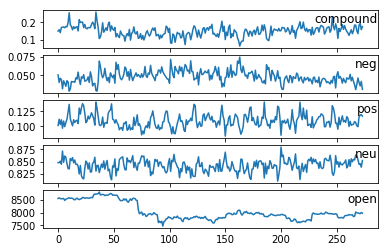

In [0]:
values = df_final.values
# specify columns to plot
groups = [ 1,2,3,4,5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_final.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [0]:
df_final.set_index('date',inplace=True)

In [0]:
cols = df_final.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_final = df_final[cols]
df_final.tail()

,open,compound,neg,pos,neu
date,,,,,
2019-06-12 05:00:00,7989.14,0.136541,0.046184,0.099503,0.854321
2019-06-12 06:00:00,7971.96,0.185249,0.039883,0.115617,0.844507
2019-06-12 07:00:00,7959.83,0.195258,0.035274,0.118733,0.845995
2019-06-12 08:00:00,8004.22,0.158983,0.041569,0.119574,0.838861
2019-06-12 09:00:00,7980.52,0.175678,0.030462,0.117095,0.852455


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_final.values)

In [0]:
scaled

array([[0.80974195, 0.44182162, 0.47659617, 0.31100904, 0.54242954],
       [0.82851008, 0.48223939, 0.25445703, 0.49669745, 0.54123504],
       [0.80726314, 0.39611096, 0.37745197, 0.33956094, 0.58613316],
       ...,
       [0.3645809 , 0.67158648, 0.15393868, 0.61593607, 0.51207824],
       [0.39802599, 0.48388921, 0.28815185, 0.63081922, 0.40924206],
       [0.38016952, 0.57027308, 0.05133234, 0.58693993, 0.60519421]])

In [0]:
rescale = scaler.inverse_transform(scaled)
rescale

array([[8.55067000e+03, 1.50853468e-01, 5.04060530e-02, 1.01504414e-01,
        8.48100883e-01],
       [8.57558000e+03, 1.58664607e-01, 3.99884170e-02, 1.11996139e-01,
        8.48018018e-01],
       [8.54738000e+03, 1.42019425e-01, 4.57564979e-02, 1.03117647e-01,
        8.51132695e-01],
       ...,
       [7.95983000e+03, 1.95257829e-01, 3.52744186e-02, 1.18733333e-01,
        8.45995349e-01],
       [8.00422000e+03, 1.58983451e-01, 4.15685997e-02, 1.19574257e-01,
        8.38861386e-01],
       [7.98052000e+03, 1.75678000e-01, 3.04625000e-02, 1.17095000e-01,
        8.52455000e-01]])

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''
    Converts the original dataframe to a format which contains
    lag shifted values of inputs which can be used as input
    to the LSTM
    '''
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
n_hours = 1
n_features = 5
n_obs = n_hours*n_features

In [0]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.809742,0.441822,0.476596,0.311009,0.542430,0.828510,0.482239,0.254457,0.496697,0.541235
2,0.828510,0.482239,0.254457,0.496697,0.541235,0.807263,0.396111,0.377452,0.339561,0.586133
3,0.807263,0.396111,0.377452,0.339561,0.586133,0.800015,0.548764,0.339172,0.479931,0.497439
4,0.800015,0.548764,0.339172,0.479931,0.497439,0.805719,0.554493,0.068412,0.231722,0.882618
5,0.805719,0.554493,0.068412,0.231722,0.882618,0.811068,0.564190,0.302906,0.442213,0.552822
6,0.811068,0.564190,0.302906,0.442213,0.552822,0.753799,0.539441,0.230299,0.277720,0.736050
7,0.753799,0.539441,0.230299,0.277720,0.736050,0.788729,0.575597,0.140863,0.398801,0.697747
8,0.788729,0.575597,0.140863,0.398801,0.697747,0.801748,0.564195,0.305418,0.490219,0.512125
9,0.801748,0.564195,0.305418,0.490219,0.512125,0.816523,0.687363,0.267841,0.699910,0.366705
10,0.816523,0.687363,0.267841,0.699910,0.366705,0.830906,0.978485,0.000000,0.930612,0.359565


In [0]:
reframed = reframed.drop(reframed.columns[-4:], axis=1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
1,0.809742,0.441822,0.476596,0.311009,0.542430,0.828510
2,0.828510,0.482239,0.254457,0.496697,0.541235,0.807263
3,0.807263,0.396111,0.377452,0.339561,0.586133,0.800015
4,0.800015,0.548764,0.339172,0.479931,0.497439,0.805719
5,0.805719,0.554493,0.068412,0.231722,0.882618,0.811068
6,0.811068,0.564190,0.302906,0.442213,0.552822,0.753799
7,0.753799,0.539441,0.230299,0.277720,0.736050,0.788729
8,0.788729,0.575597,0.140863,0.398801,0.697747,0.801748
9,0.801748,0.564195,0.305418,0.490219,0.512125,0.816523
10,0.816523,0.687363,0.267841,0.699910,0.366705,0.830906


In [0]:
values = reframed.values
n_train_hours = 192
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(192, 6)

In [0]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]

In [0]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(192, 1, 5) (192,) (81, 1, 5) (81,)


In [0]:
test_y

array([0.32261443, 0.31658693, 0.30492371, 0.3159013 , 0.32550763,
       0.3253268 , 0.32103221, 0.33813524, 0.34662648, 0.325809  ,
       0.32173291, 0.30754568, 0.22670936, 0.22101337, 0.24060275,
       0.21296666, 0.14135242, 0.14282162, 0.16360897, 0.2101488 ,
       0.19286495, 0.12937276, 0.09812017, 0.12620079, 0.10184215,
       0.12229798, 0.13080429, 0.14372575, 0.13461669, 0.12634394,
       0.17715577, 0.1838463 , 0.18790733, 0.17640234, 0.14927105,
       0.35016764, 0.38765116, 0.35715201, 0.35844038, 0.35112451,
       0.34858542, 0.35092108, 0.35890752, 0.3835826 , 0.35473347,
       0.35745338, 0.36165003, 0.41066868, 0.39630816, 0.37353927,
       0.36410623, 0.37017894, 0.35752872, 0.36363157, 0.347945  ,
       0.35197589, 0.36317951, 0.34953475, 0.26200791, 0.2402637 ,
       0.2436165 , 0.25469203, 0.24373705, 0.23674515, 0.29648521,
       0.31139574, 0.3108382 , 0.31654172, 0.3387832 , 0.33023168,
       0.32666792, 0.33255227, 0.27735543, 0.29090224, 0.41295

In [0]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

Train on 192 samples, validate on 81 samples
Epoch 1/100
 - 3s - loss: 0.2521 - val_loss: 0.0786
Epoch 2/100
 - 0s - loss: 0.2037 - val_loss: 0.0653
Epoch 3/100
 - 0s - loss: 0.1894 - val_loss: 0.0632
Epoch 4/100
 - 0s - loss: 0.1804 - val_loss: 0.0610
Epoch 5/100
 - 0s - loss: 0.1731 - val_loss: 0.0589
Epoch 6/100
 - 0s - loss: 0.1654 - val_loss: 0.0566
Epoch 7/100
 - 0s - loss: 0.1573 - val_loss: 0.0542
Epoch 8/100
 - 0s - loss: 0.1486 - val_loss: 0.0516
Epoch 9/100
 - 0s - loss: 0.1390 - val_loss: 0.0488
Epoch 10/100
 - 0s - loss: 0.1286 - val_loss: 0.0459
Epoch 11/100
 - 0s - loss: 0.1178 - val_loss: 0.0427
Epoch 12/100
 - 0s - loss: 0.1048 - val_loss: 0.0393
Epoch 13/100
 - 0s - loss: 0.0919 - val_loss: 0.0360
Epoch 14/100
 - 0s - loss: 0.0752 - val_loss: 0.0332
Epoch 15/100
 - 0s - loss: 0.0585 - val_loss: 0.0300
Epoch 16/100
 - 0s - loss: 0.0440 - val_loss: 0.0268
Epoch 17/100
 - 0s - loss: 0.0361 - val_loss: 0.0244
Epoch 18/100
 - 0s - loss: 0.0333 - val_loss: 0.0236
Epoch 19/1

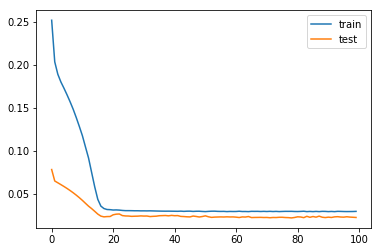

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 48.620


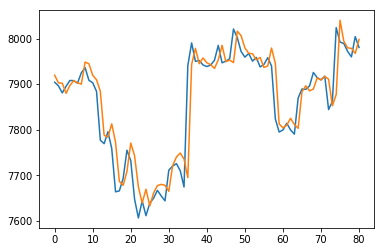

In [0]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [0]:
inv_yhat.shape

(81,)

In [0]:
df_sol = pd.DataFrame({'forecast':inv_yhat,'actual':inv_y})

In [0]:
pd.options.display.max_rows = 1000
df_sol

,forecast,actual
0,7919.477079,7904.13
1,7902.590637,7896.13
2,7901.973023,7880.65
3,7879.708270,7895.22
4,7897.056755,7907.97
5,7907.504057,7907.73
6,7902.976102,7902.03
7,7899.991074,7924.73
8,7948.529216,7936.00
9,7944.695335,7908.37
